In [1]:
import cv2
import glob
import random
import matplotlib.pyplot as plt

from detectron2 import model_zoo
from detectron2.data import DatasetCatalog
from detectron2.data import MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer

In [2]:
PATH = {
    'train': 'dataset/vegetables/train',
    'val': 'dataset/vegetables/val',
    'test': 'dataset/vegetables/test',
    'coco_train': 'dataset/vegetables/coco/train.json',
    'coco_val': 'dataset/vegetables/coco/val.json',
    'coco_test': 'dataset/vegetables/coco/test.json',
    'faster_rcnn_X_101_32x8d_FPN_3x': 'COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml',
    'model': 'output/model_final.pth'
}

In [3]:
register_coco_instances('train_dataset', {}, PATH['coco_train'], PATH['train'])
register_coco_instances('val_dataset', {}, PATH['coco_val'], PATH['val'])
# register_coco_instances("test_dataset", {}, PATH['coco_test'], PATH['test'])


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



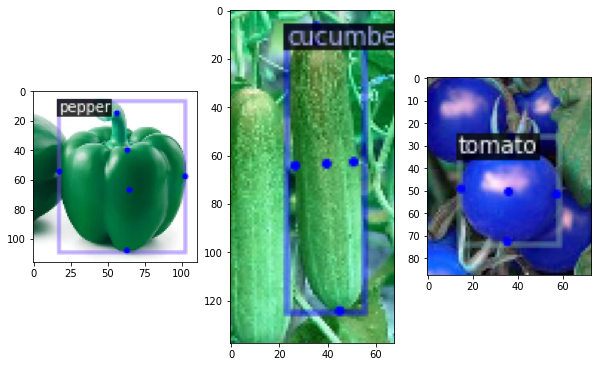

In [4]:
train_dataset_metadata = MetadataCatalog.get("train_dataset")
train_dataset_dicts = DatasetCatalog.get("train_dataset")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
for sample, ax in zip(random.sample(train_dataset_dicts, 3), axs.ravel()):
    img = cv2.imread(sample["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_dataset_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(sample)
    ax.imshow(vis.get_image()[:, :, ::-1])
plt.show()

In [5]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(PATH['faster_rcnn_X_101_32x8d_FPN_3x']))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1
cfg.MODEL.WEIGHTS = PATH['model']
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

/home/hujiajun/anaconda3/envs/food-detection/lib/python3.7/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352464346/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


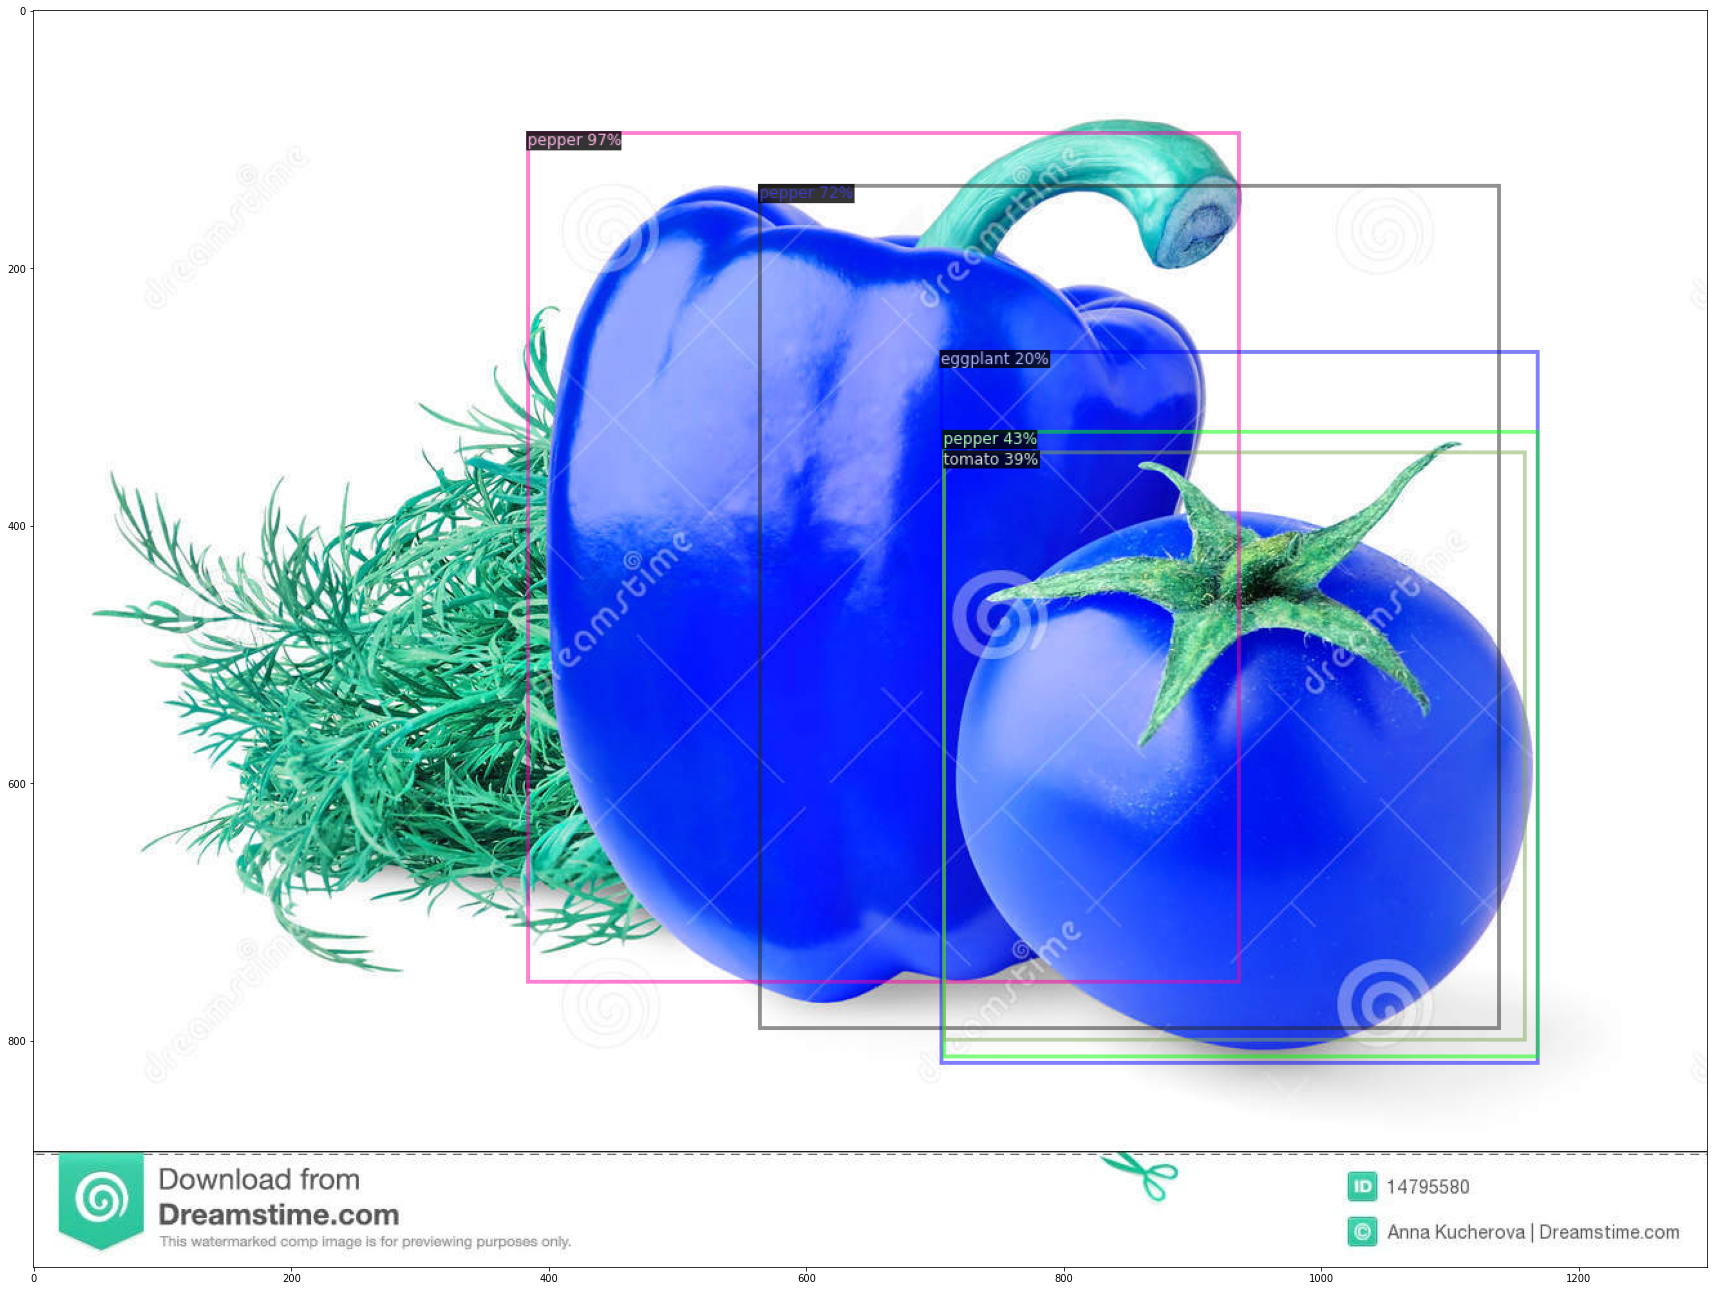

['pepper', 'pepper', 'pepper', 'tomato', 'eggplant']
[0.9749649167060852, 0.7160787582397461, 0.42717570066452026, 0.386111319065094, 0.2014237642288208]
Instances(num_instances=5, image_height=976, image_width=1300, fields=[pred_boxes: Boxes(tensor([[ 383.5137,   95.2015,  935.7720,  754.1969],
        [ 563.7645,  136.1132, 1137.6025,  790.4733],
        [ 706.4970,  326.9478, 1168.3743,  812.2542],
        [ 707.3228,  342.6306, 1158.4087,  799.2390],
        [ 704.9058,  264.7558, 1168.0173,  816.5258]])), scores: tensor([0.9750, 0.7161, 0.4272, 0.3861, 0.2014]), pred_classes: tensor([2, 2, 2, 3, 1])])


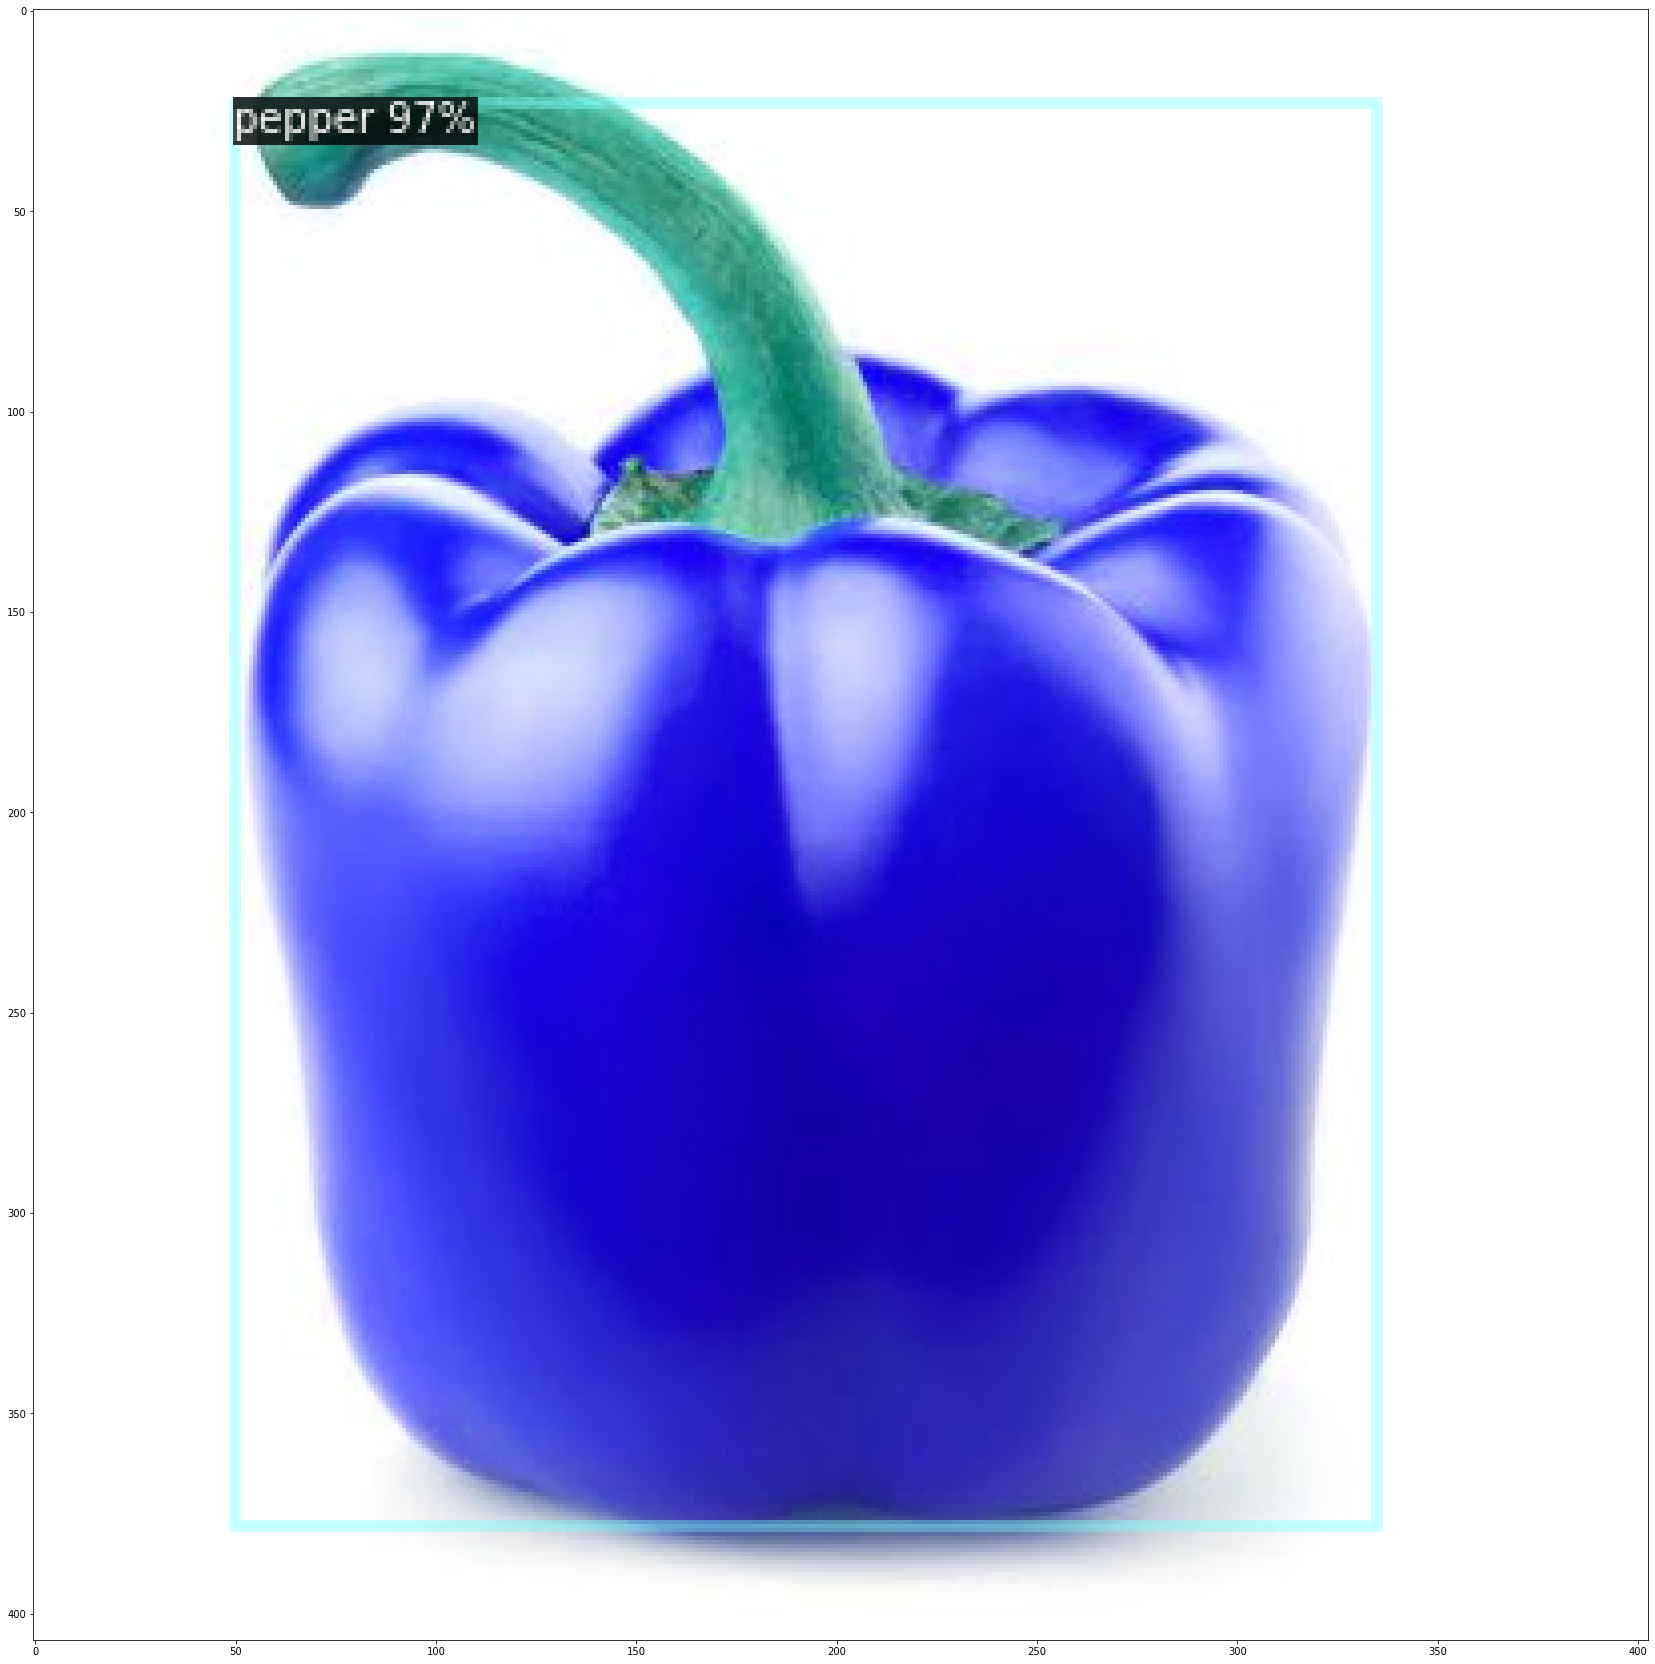

['pepper']
[0.9652080535888672]
Instances(num_instances=1, image_height=407, image_width=403, fields=[pred_boxes: Boxes(tensor([[ 50.2443,  22.9109, 335.1830, 377.9052]])), scores: tensor([0.9652]), pred_classes: tensor([2])])


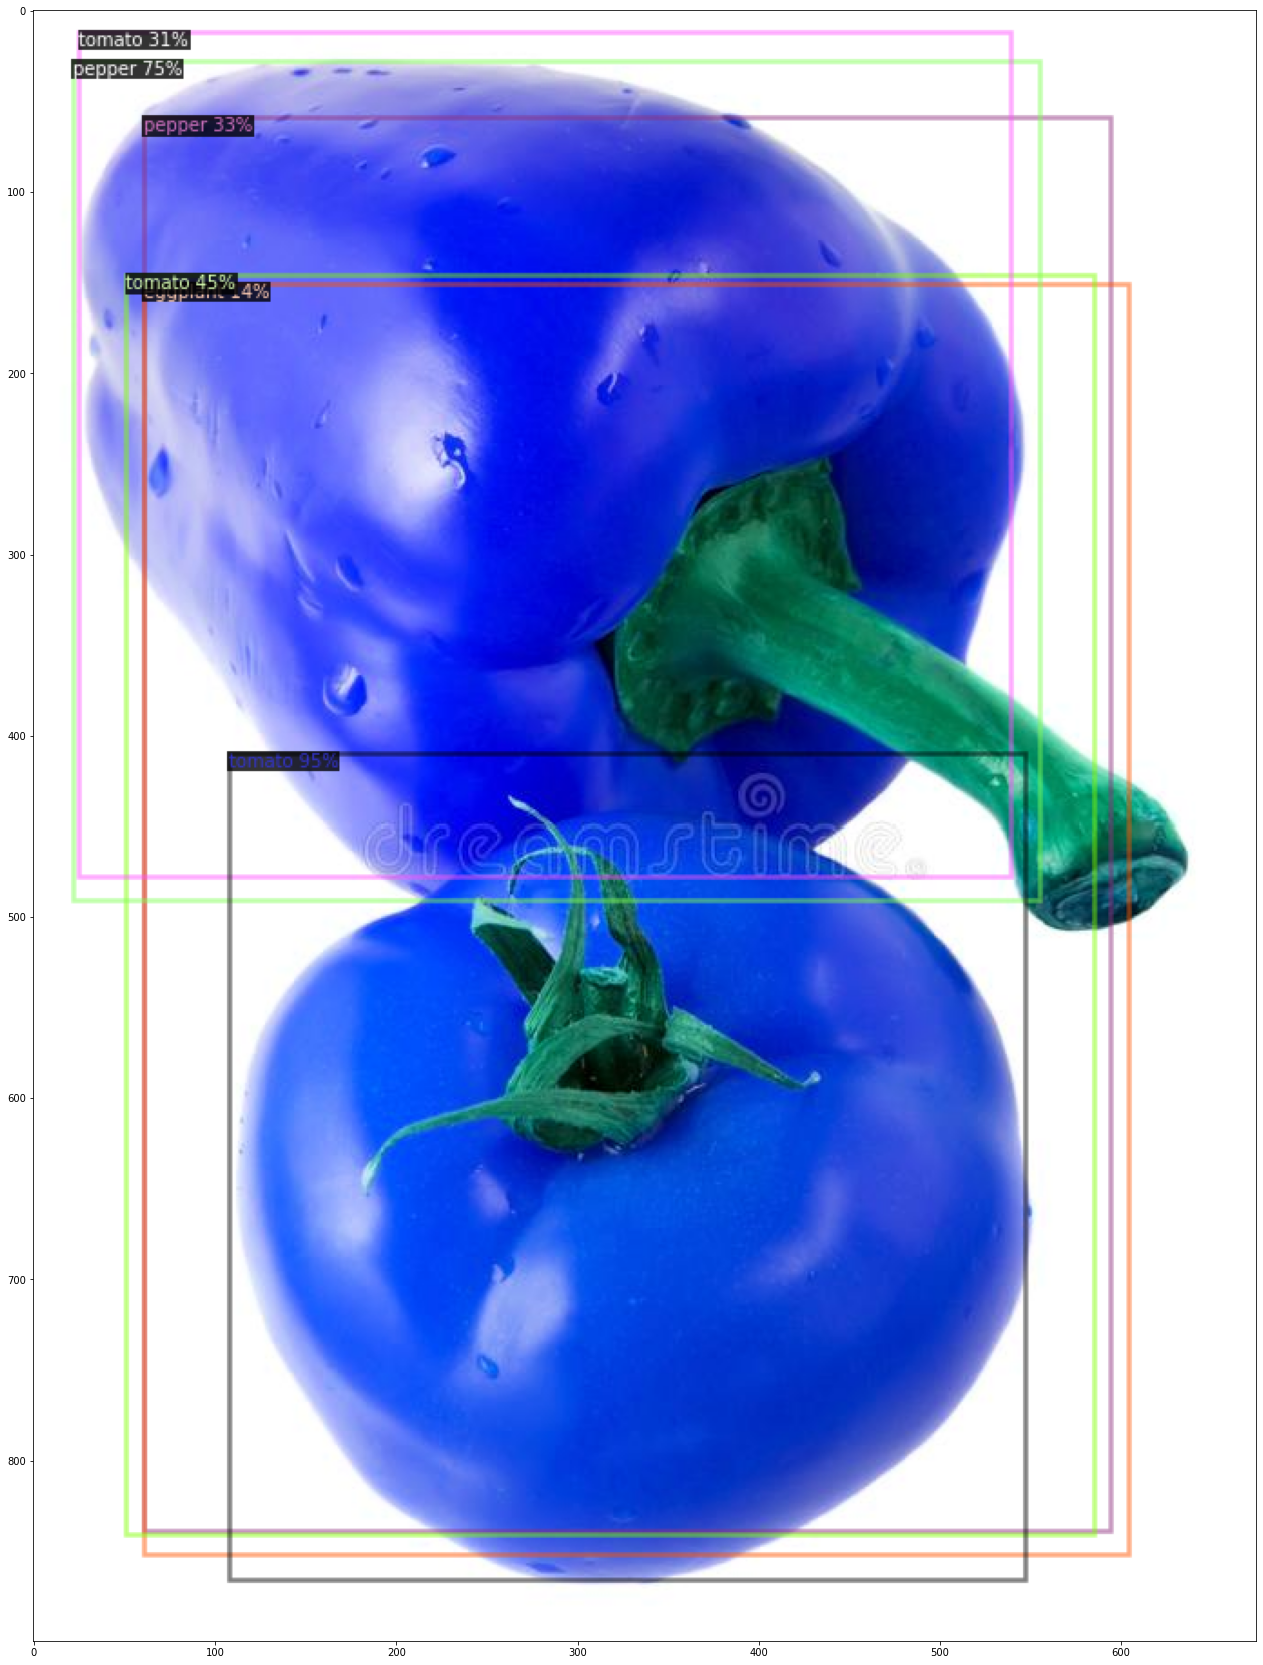

['tomato', 'pepper', 'tomato', 'pepper', 'tomato', 'eggplant']
[0.9545609354972839, 0.7514538168907166, 0.446501225233078, 0.3309028744697571, 0.30619701743125916, 0.1375783532857895]
Instances(num_instances=6, image_height=900, image_width=675, fields=[pred_boxes: Boxes(tensor([[107.9242, 409.5305, 546.7042, 865.7415],
        [ 22.0338,  27.7628, 555.2236, 490.7261],
        [ 51.2228, 146.0205, 585.4700, 841.3303],
        [ 60.9831,  59.0774, 594.3599, 839.1631],
        [ 25.3052,  11.7338, 538.5131, 478.0102],
        [ 60.8482, 150.6570, 603.9758, 851.9824]])), scores: tensor([0.9546, 0.7515, 0.4465, 0.3309, 0.3062, 0.1376]), pred_classes: tensor([3, 2, 3, 2, 3, 1])])


In [6]:
predictor = DefaultPredictor(cfg)
for image in glob.glob('testimages/*'):
    im = cv2.imread(image)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=train_dataset_metadata)
    instances = outputs["instances"].to("cpu")
    out = v.draw_instance_predictions(instances)
    plt.figure(figsize = (30 ,30))
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.show()
    pred_classes = instances.pred_classes.tolist()
    pred_scores = instances.scores.tolist()
    pred_class_names = [train_dataset_metadata.thing_classes[x] for x in pred_classes]
    print(pred_class_names)
    print(pred_scores)
    print(instances)